## AoUD - List 1 - Piotr Paduszyński

In [1]:
import sklearn
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#### Data which I choose to analyse contains informations about most streamed songs on Spotify in 2019 global. 

Data can be found and download from Kaggle. There is a ranking based on number of streams in 2019. In data we can find most important information like duration of the song, artist name nad streams, but there are few additional measures. To be specific data contains: 

1) Country, which is useless information, because in each cell there is 'global'

2) Rank which is simply position based on number of streams

3) Track_id

4) Streams - number of streams in 2019

5) Track Name 

6) Artist

7) URL - address directly to that song on Spotify

8) acousticness - acoustic measure from 0.0 (rough music, many distortions, shrieks) to 1.0 (acoustic, clean sound)

9) danceability - how suitable a track is for dancing, value of 0.0 is least danceable and 1.0 is most danceable.

10) energy - measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

11) instumentalness - Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

12) liveness - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [2]:
most_streamed = pd.read_csv('spotify_global_2019_most_streamed_tracks_audio_features.csv')
most_streamed.iloc[:3,:12]

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,instrumentalness,liveness
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,0.00,0.1660
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,0.13,0.1000
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,0.00,0.0881


13) loudness - values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

14) speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

15) valence - a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

16) tempo - the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

17) time_signature - an estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

18) duartion_ms - the duration of the track in milliseconds.

19) key - the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

20) mode - indicates the modality of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

21) Artist_id - id on Spotify

22) Artist popularity

23) Artist follower

24) Artist_img 


In [3]:
most_streamed = pd.read_csv('spotify_global_2019_most_streamed_tracks_audio_features.csv')
most_streamed.iloc[:3,12:]

,loudness,speechiness,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,-4.724,0.0476,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,-10.965,0.3750,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,-10.732,0.3340,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...


###### Prepare data to analyse
Before analysing data I have thought what can be really important knowledge and what can be interesting for example for the music blog. Additional I decided to throw away useless columns and check if data is complete



In [4]:
most_streamed = pd.read_csv('spotify_global_2019_most_streamed_tracks_audio_features.csv')
most_streamed = most_streamed.drop(['Country', 'Track_id', 'URL', 'Artist_id', 'Artist_img'], axis=1)
most_streamed.isnull().sum()

Rank                 0
Streams              0
Track Name           0
Artist               0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
valence              0
tempo                0
time_signature       0
duration_ms          0
key                  0
mode                 0
Artist_popularity    0
Artist_follower      0
dtype: int64

##### Question 1
The first question I ask myself is how many songs has each artist in that ranking. If I answer that, I can check who are the leaders of all artists and how it looks in percentage division.

In [5]:
def Amount_songs_of_each_artist(artists):
    # THIS FUNCTION COUNT HOW MANY SONGS HAS EACH ARTIST IN RANKING
    
    freq = {} #frequencies how many song has each artist in data
    
    for artist in artists: # I choose one by one artist
        if artist not in freq:
            freq[artist] = 1 # I append artist to the dictionary 
        else:
            freq[artist] = freq[artist] + 1 # I add 1 every time when that artist appear again in ranking
            
    return freq


def Leaders(freq,how_many):
    
    number = how_many
    length = len(freq)
    x = np.sort(list(freq.values()))

    if x[length-number] != x[length-number-1]: # Check if there is no ex aequo
        most_songs = x[length-number:length]
    
    else:
        i = 1
        while x[length-number-i] == x[length-number-1-i]: # If it is, we are looking for the nearest place with no ex aequo
            i = i+1    
        most_songs = x[length-number-i:length]
        
    return most_songs


def Circle_plot_for_leaders(freq,most_songs):
    
    labels = []
    sizes = []

    for artist in freq.keys():

        if freq[artist] in most_songs:

            labels.append(artist+ ' '+str(freq[artist]))
            sizes.append(freq[artist])
        
    explode = np.zeros((len(most_songs),))  # distances from the center

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Leaders in respect of number of songs in ranking')
    plt.show()

Below we can see that on podium are Post Malone, Juice WRLD and Ariana Grande.

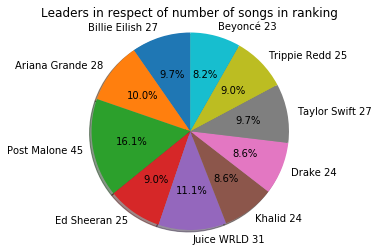

In [6]:
artists = most_streamed['Artist']
freq = Amount_songs_of_each_artist(artists)   
most_songs = Leaders(freq,10) # Changing 10 for any other value will also work
Circle_plot_for_leaders(freq,most_songs)

##### Question 2
How long are these songs and how duration influence on ranking position? There is comparison histograms for all songs and for x first songs. (x = 100)

In [7]:
def duration_histograms(duration,num):

    duration_minutes = np.ones(len(duration)) # DURATION OF SONGS IN MINUTES
    duration_100 = np.ones(num) # DURATION OF FIST 100 SONGS IN MINUTES

    for i in range(len(duration)):

        if i <num:
            in_minutes = round(duration[i]/60000,2)
            duration_minutes[i] = in_minutes
            duration_100[i] = in_minutes

        else:
            in_minutes = round(duration[i]/60000,2)
            duration_minutes[i] = in_minutes

    sns.distplot(duration_minutes,bins = 40) 
    fg = sns.distplot(duration_100)
    fg.set(xlim=(0,7))
    plt.xlabel("Duration in minutes")
    plt.title('Normed histograms for all and for '+str(num)+' best songs')
    plt.legend(['all songs',str(num)+' best songs'])
    plt.show()

    print('mean of '+str(num)+' songs - mean of all songs = ',str(duration_100.mean()),'-',
        str(duration_minutes.mean()),'=', duration_100.mean()-duration_minutes.mean())
    

    return duration_minutes

In the cell below there are histograms of duration (in minutes) for all songs and for first 100. The mean value of duration is about 3.38 minutes. 

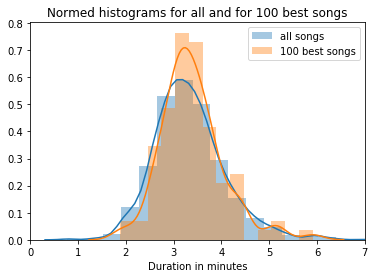

mean of 100 songs - mean of all songs =  3.3933999999999997 - 3.3768025626092024 = 0.01659743739079733


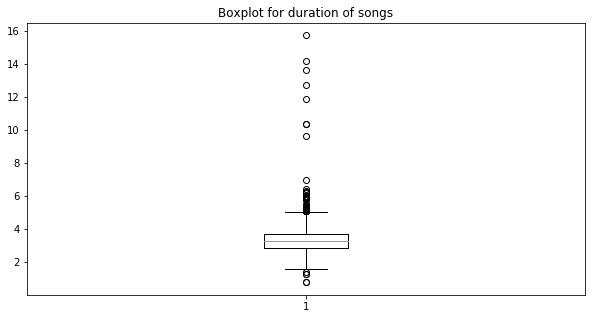

In [8]:
duration = most_streamed['duration_ms']
duration_minutes = duration_histograms(duration,100)
fig = plt.figure(figsize = (10,5))
boxplot = plt.boxplot(duration_minutes)
plt.title('Boxplot for duration of songs')
plt.show()


##### Question 3
How behave songs which duration is less than 2 minutes or more than 5 minutes? How many of them are in the first 250 places.
What statistics they have (quantiles, mean). To comparison there will be also same questions, but for songs which duration is more than 3 and less than 4 minutes


Ranking songs which duration is less than 2 minutes or more than 5 minutes
      Rank  duration_ms         Artist
16    17.0       301714       Anuel AA
20    21.0       312820   Travis Scott
42    43.0       309120    Jhay Cortez
55    56.0       113013      Lil Nas X
65    66.0       354320          Queen
87    88.0       119133   XXXTENTACION
122  123.0       360960          Dalex
135  136.0       114893      Lil Nas X
165  166.0       114893      Lil Nas X
174  175.0       305962  Justin Quiles

Quantiles of ranking for that songs
 0.25     586.5
0.50     994.0
0.75    1338.5
Name: Rank, dtype: float64 
Mean value: 944.0526315789474

In the first 250 places there is 12 such songs


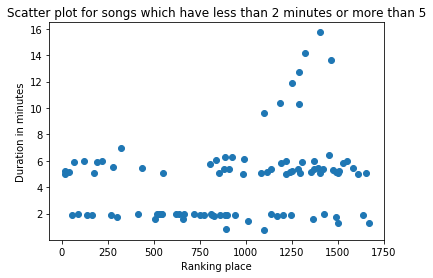

In [10]:
df = most_streamed.loc[(most_streamed.duration_ms < 120000) | (most_streamed.duration_ms > 300000)]
print('\nRanking songs which duration is less than 2 minutes or more than 5 minutes')
print(df[['Rank','duration_ms','Artist']].head(10))
print('\nQuantiles of ranking for that songs\n',df.Rank.quantile([.25, .5, .75]),'\nMean value:', df.Rank.mean())

plt.scatter(df.Rank,df.duration_ms/60000)
how_many_in_250 = df.loc[df.Rank<250].Rank.count()
print('\nIn the first 250 places there is',how_many_in_250,'such songs')
plt.title('Scatter plot for songs which have less than 2 minutes or more than 5')
plt.xlabel('Ranking place')
plt.ylabel('Duration in minutes')
plt.show()

That can suggest that it is more probably to get good ranking place creating songs near between 3 and 4 minutes


Quantiles of ranking for that songs
 0.25     359.25
0.50     781.50
0.75    1241.75
Name: Rank, dtype: float64 
Mean value: 805.0811455847255

In the first 250 places there is 146 such songs


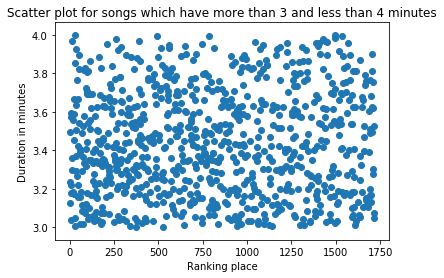

In [10]:
df2 = most_streamed.loc[(most_streamed.duration_ms > 180000) & (most_streamed.duration_ms < 240000)]
print('\nQuantiles of ranking for that songs\n',df2.Rank.quantile([.25, .5, .75]),'\nMean value:', df2.Rank.mean())

how_many_in_250 = df2.loc[df2.Rank<250].Rank.count()
print('\nIn the first 250 places there is',how_many_in_250,'such songs')

plt.scatter(df2.Rank,df2.duration_ms/60000)
plt.title('Scatter plot for songs which have more than 3 and less than 4 minutes')
plt.xlabel('Ranking place')
plt.ylabel('Duration in minutes')
plt.show()


##### Question 4 
How many songs there are released by artists which have the most followers? 

['Ariana Grande', 'Ed Sheeran', 'Drake', 'Justin Bieber', 'Eminem', 'Rihanna'] [28, 25, 24, 2, 1, 1]


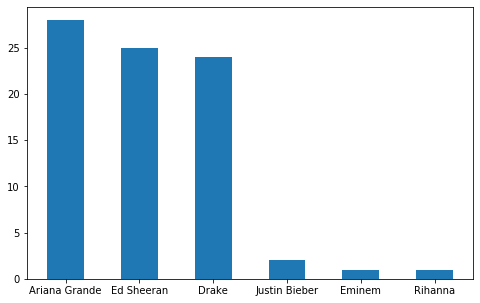

In [11]:
followers_num = most_streamed.loc[(most_streamed.Artist_follower > most_streamed.Artist_follower.quantile(.95))]
names = []
songs_num = []

for name in followers_num.Artist:
    if name not in names:
        num = followers_num.loc[(followers_num.Artist == name)].Rank.count()
        names.append(name)
        songs_num.append(num)
    else:
        pass
print(names,songs_num)

plt.figure(figsize=(8, 5))
plt.bar(names, songs_num, align='center', width=0.5)
plt.show()

#print(most_streamed.dtypes)
#most_streamed = most_streamed.drop(index=0, columns = 'Artists')

We see that there are no artists like Post Malone or Juice WRLD, whose was on circle plot. 

###### Summary

To summarise all steps in analysis there are few observations:

Leaders in amount of songs in ranking are from the pop and rap music.

Mean value of songs equals 3.38 and if we want to get with our song good place in ranking it is better to have duration of that song near to mean. 

Greater number of followers not always means that artist will have more songs in ranking.
